# Récupération du code


Récupération du code

In [1]:
!git clone https://gitlab.com/ketsapiwiq/ranking_methods

Cloning into 'ranking_methods'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 431 (delta 36), reused 0 (delta 0), pack-reused 367 (from 2)
Receiving objects: 100% (431/431), 16.46 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (199/199), done.


On installe le package récupéré

In [ ]:
!pip install -e ranking_methods

Obtaining file:///content/ranking_methods
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00
  Building editable for rank-comparia (pyproject.toml) ... done
  Created wheel for rank-comparia: filename=rank_comparia-0.0.1-py3-none-any.whl size=8187 sha256=c4202e7faffd9d8f91cc4e3cf5a2667179d8fbfeb225d680c1d82fb639f25595
  Stored in directory: /tmp/pip-ephem-wheel-cache-



---



# **Avant de continuer, il faut relancer l'environnement d'exécution :**
# **`Exécution > Redémarrer la session`**

# Récupération du dataset

Puis entrons notre token Hugging Face **dans l'onglet Secrets de la sidebar de Colab (en l'appelant `HF_TOKEN`)** ou dans le champ de saisie:

In [ ]:
import os
from getpass import getpass

#cache_dir = input("Indicate path to all Hugging Face caches:")
cache_dir = "cache"
os.environ["HF_DATASETS_CACHE"] = cache_dir
os.environ["HF_HUB_CACHE"] = cache_dir
#os.environ["HF_TOKEN"] = getpass(f"HuggingFace token (puis presser Entrée):\n")

from google.colab import userdata
try:
  os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')
except:
  os.environ["HF_TOKEN"] = getpass(f"HuggingFace token (puis presser Entrée):\n")

HuggingFace token (puis presser Entrée):
··········




---



# **Pipeline avec ranker ELO votes + reactions**



In [ ]:
from rank_comparia.pipeline import RankingPipeline
from pathlib import Path
pipeline = RankingPipeline(
    method="elo_random",
    include_votes=True,
    include_reactions=True,
    bootstrap_samples=50, # 100?
    mean_how="token",
    batch=False,
    export_path=Path("output"),
    models_data=Path("/content/ranking_methods/data/models_data.json")
)
pipeline.matches
#ranker = pipeline.ranker


votes.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/83758 [00:00<?, ? examples/s]

Final votes dataset contains 78022 conversations pairs.


reactions.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/53602 [00:00<?, ? examples/s]

Reactions data originally contains 29984 conversations pairs.
Final reactions dataset contains 27796 conversations pairs.


conversation_pair_id,model_a,model_b,score,categories,model_a_active_params,model_b_active_params,total_conv_a_output_tokens,total_conv_a_kwh,total_conv_b_output_tokens,total_conv_b_kwh
str,str,str,i32,list[str],f64,f64,f64,f64,f64,f64
"""169542290b2140ae81f0fcb76f2f68…","""aya-expanse-32b""","""mistral-small-3.1-24b""",1,"[""Entertainment & Travel & Hobby"", ""Sports"", ""Arts""]",32.0,24.0,383.0,0.002733,524.0,0.003151
"""cd95a38e700543eab940553f788f15…","""aya-expanse-32b""","""gemma-3-12b""",1,"[""Education""]",32.0,12.0,834.0,0.005951,1615.0,0.006992
"""b0533be4ae45410f80921d9457e13f…","""llama-3.1-nemotron-70b-instruc…","""gemma-3-4b""",2,"[""Business & Economics & Finance"", ""Education""]",70.0,4.0,820.0,0.010224,1027.0,0.003293
"""e0dbdc4d2a96404db03c23456a356f…","""gemma-3-12b""","""llama-3.3-70b""",0,"[""Education""]",12.0,70.0,1796.0,0.007775,1045.0,0.01303
"""f8d2e73acc0c42c391ea0f34b6d1c8…","""hermes-3-llama-3.1-405b""","""llama-3.3-70b""",0,"[""Personal Development & Human Resources & Career"", ""Business & Economics & Finance""]",405.0,70.0,552.0,0.131335,708.0,0.008828
…,…,…,…,…,…,…,…,…,…,…
"""633c93b0728d47db8045460446d9a8…","""mistral-small-24b-instruct-250…","""gemma-3-12b""",0,"[""Education"", ""Environment"", ""Natural Science & Formal Science & Technology""]",24.0,12.0,1016.0,0.006109,2139.0,0.00926
"""8933addde32e4c7e8b180447c2d808…","""lfm-40b""","""llama-3.1-405b""",2,"[""Other""]",40.0,405.0,11.0,0.000091,9.0,0.002141
"""b832ef25fdcf445e90f64e4a4ea5c8…","""mistral-nemo-2407""","""ministral-8b-instruct-2410""",0,"[""Education"", ""Food & Drink & Cooking"", ""Health & Wellness & Medicine""]",12.0,8.0,513.0,0.002221,1045.0,0.003937


In [ ]:
scores = pipeline.run()

Computing bootstrap scores from a sample of 105818 matches.


Processing bootstrap samples: 100%|██████████| 50/50 [00:23<00:00,  2.11it/s]


In [ ]:
scores

model_name,median,p2.5,p97.5,total_output_tokens,conso_all_conv,n_match,mean_conso_per_match,mean_conso_per_token
str,f64,f64,f64,f64,f64,u32,f64,f64
"""gpt-oss-120b""",1193.41959,1063.163466,1280.686259,270359.0,0.904851,147,0.006155,0.000003
"""gemini-2.5-flash""",1187.516474,1111.136507,1273.067294,162301.0,2.023688,131,0.015448,0.000012
"""glm-4.5""",1168.632306,1110.126251,1267.856169,43876.0,6.905821,23,0.300253,0.000157
"""gemini-2.0-flash-exp""",1140.320837,1023.781418,1189.75144,3.936799e6,32.512579,2816,0.011546,0.000008
"""gemma-3-27b""",1127.930453,1027.916991,1204.813194,5.706252e6,36.71549,4102,0.008951,0.000006
…,…,…,…,…,…,…,…,…
"""mixtral-8x22b-instruct-v0.1""",842.193437,763.310762,922.666336,3.041056e6,53.624914,5458,0.009825,0.000018
"""chocolatine-2-14b-instruct-v2.…",824.756986,724.346091,944.610381,533384.0,1.934863,1796,0.001077,0.000004
"""Yi-1.5-9B-Chat""",778.08306,679.859862,918.777085,47531.0,0.182743,65,0.002811,0.000004


# Graphes

On peut désormais accéder aux graphes générés dans `output/`.

In [ ]:
import IPython
IPython.display.HTML(filename='output/elo_random_winrate_count.svg')

In [ ]:

IPython.display.HTML(filename='/content/output/elo_random_count_heatmap.svg')


In [ ]:
IPython.display.HTML(filename='/content/output/elo_random_elo_score_conso.html')


In [ ]:
IPython.display.HTML(filename='/content/output/elo_random_elo_frugal.html')


## Export consolidé avec infos du modèle

In [ ]:
from pathlib import Path
import polars as pl

info_model = pl.read_json(source=Path(".").resolve() / "ranking_methods" / "data" / "models_data.json")

In [ ]:
final_df = info_model.join(scores, on="model_name")

final_df = final_df.with_columns(
    # mean_conso_per_token: kwh per token
    (pl.col("mean_conso_per_token") * 1000 * 1000).alias("mean_wh_per_thousand_token")
)

final_df = final_df.with_columns([
    (pl.col("median") - pl.col("p2.5")).alias("median_minus_p2.5"),
    (pl.col("p97.5") - pl.col("median")).alias("p97.5_minus_median")
])

final_df

name,model_name,organization,license,median,p2.5,p97.5,total_output_tokens,conso_all_conv,n_match,mean_conso_per_match,mean_conso_per_token,mean_wh_per_thousand_token,median_minus_p2.5,p97.5_minus_median
str,str,str,str,f64,f64,f64,f64,f64,u32,f64,f64,f64,f64,f64
"""Gemini 2.0 Flash""","""gemini-2.0-flash-exp""","""Google""","""Proprietary""",1140.320837,1023.781418,1189.75144,3.936799e6,32.512579,2816,0.011546,0.000008,8.258633,116.539419,49.430603
"""Gemma-3 27B""","""gemma-3-27b""","""Google""","""Gemma""",1127.930453,1027.916991,1204.813194,5.706252e6,36.71549,4102,0.008951,0.000006,6.434257,100.013462,76.882741
"""Gemini 2.0 Flash""","""gemini-2.0-flash-001""","""Google""","""Proprietary""",1117.433458,1007.072883,1208.657583,7.965127e6,65.781063,5578,0.011793,0.000008,8.258633,110.360575,91.224125
"""DeepSeek-V3 Chat""","""deepseek-v3-chat""","""DeepSeek""","""DeepSeek""",1084.819171,992.891175,1168.787286,5.638296e6,265.145042,5394,0.049156,0.000047,47.02574,91.927997,83.968115
"""Command A""","""command-a""","""Cohere""","""CC-BY-NC-4.0""",1081.515844,1002.503292,1151.666553,3.545283e6,64.604049,3602,0.017936,0.000018,18.222537,79.012552,70.150709
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Mixtral 8x22B Instruct""","""mixtral-8x22b-instruct-v0.1""","""Mistral AI""","""Apache 2.0""",842.193437,763.310762,922.666336,3.041056e6,53.624914,5458,0.009825,0.000018,17.633649,78.882675,80.472898
"""Chocolatine-2-14b Instruct""","""chocolatine-2-14b-instruct-v2.…","""jpacifico (individual)""","""Apache 2.0""",824.756986,724.346091,944.610381,533384.0,1.934863,1796,0.001077,0.000004,3.627523,100.410894,119.853396
"""Yi-1.5 9B Chat""","""Yi-1.5-9B-Chat""","""01 AI""","""Proprietary""",778.08306,679.859862,918.777085,47531.0,0.182743,65,0.002811,0.000004,3.84472,98.223198,140.694025


In [ ]:
from rank_comparia.utils import save_data

save_path = Path(".").resolve() / "ranking_methods" / "data"
save_data(final_df, "all_info_for_chart_drawing", save_path)
final_df.write_json(file=save_path / "all_info_for_chart_drawing.json")


GRAPHIQUE CHRONOLOGIE MODELES ARENE

In [ ]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

print("Loading dataset...")
ds = load_dataset('ministere-culture/comparia-conversations')
df = pd.DataFrame(ds['train'])

print(f"Dataset loaded: {len(df):,} conversations")

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'].dt.date)

print("Calculating model lifespans for ALL models...")

Loading dataset...


README.md:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

conversations.parquet:   0%|          | 0.00/1.40G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/251503 [00:00<?, ? examples/s]

Dataset loaded: 251,503 conversations
Calculating model lifespans for ALL models...


In [ ]:
# Get unique models from both columns
all_models_a = df.groupby('model_a_name')['date'].agg(['min', 'max', 'count']).reset_index()
all_models_a.columns = ['model', 'first', 'last', 'count_a']

all_models_b = df.groupby('model_b_name')['date'].agg(['min', 'max', 'count']).reset_index()
all_models_b.columns = ['model', 'first', 'last', 'count_b']

# Merge to get complete timeline
timeline = all_models_a.merge(all_models_b, on='model', how='outer', suffixes=('_a', '_b'))

# Calculate true first and last dates
timeline['first'] = timeline[['first_a', 'first_b']].min(axis=1)
timeline['last'] = timeline[['last_a', 'last_b']].max(axis=1)
timeline['total'] = timeline['count_a'].fillna(0) + timeline['count_b'].fillna(0)

# Keep only necessary columns
timeline = timeline[['model', 'first', 'last', 'total']]
timeline['duration_days'] = (timeline['last'] - timeline['first']).dt.days

# Sort by first appearance date
timeline = timeline.sort_values('first')

print(f"Found {len(timeline)} unique models")

Found 66 unique models


In [ ]:
# Create the comprehensive timeline visualization
fig, ax = plt.subplots(figsize=(18, len(timeline) * 0.35 + 2))

# Create color gradient based on usage (log scale for better differentiation)
norm = plt.Normalize(vmin=np.log1p(timeline['total'].min()),
                    vmax=np.log1p(timeline['total'].max()))
colors = plt.cm.viridis(norm(np.log1p(timeline['total'])))

for i, (idx, row) in enumerate(timeline.iterrows()):
    # Draw horizontal bar for active period
    duration = (row['last'] - row['first']).days

    # Main timeline bar
    bar = ax.barh(i, duration, left=row['first'], height=0.5,
                  color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.3)

    # Add start marker (green circle)
    ax.scatter(row['first'], i, s=25, color='green', zorder=5,
               edgecolor='darkgreen', linewidth=0.5, alpha=0.8)

    # Add end marker (red square)
    ax.scatter(row['last'], i, s=25, color='red', marker='s', zorder=5,
               edgecolor='darkred', linewidth=0.5, alpha=0.8)

    # Add model name on the left (smaller font for all models)
    ax.text(timeline['first'].min() - pd.Timedelta(days=3), i,
            row['model'][:30], ha='right', va='center', fontsize=7)

    # Add usage count on the right
    ax.text(timeline['last'].max() + pd.Timedelta(days=3), i,
            f"{int(row['total']):,}", ha='left', va='center',
            fontsize=6, color='#666666')

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Set limits
ax.set_ylim(-1, len(timeline))
ax.set_xlim(timeline['first'].min() - pd.Timedelta(days=7),
            timeline['last'].max() + pd.Timedelta(days=30))
ax.set_yticks([])

# Add title and labels
ax.set_title(f'Complete Model Lifespan Timeline - All {len(timeline)} Models',
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Timeline (Oct 2024 - Sep 2025)', fontsize=12)

# Add legend
green_marker = plt.Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='green', markersize=6,
                         label='First conversation')
red_marker = plt.Line2D([0], [0], marker='s', color='w',
                       markerfacecolor='red', markersize=6,
                       label='Last conversation')
ax.legend(handles=[green_marker, red_marker], loc='upper right',
          frameon=True, fancybox=True, shadow=True, fontsize=9)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Add usage count label
ax.text(timeline['last'].max() + pd.Timedelta(days=3), -0.5,
        'Total', ha='left', va='center', fontsize=7,
        style='italic', color='#666666')

plt.tight_layout()
plt.savefig('all_models_timeline.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.close()

print("✓ Saved: all_models_timeline.png")

# Create a second version sorted by total usage for better insight
timeline_by_usage = timeline.sort_values('total', ascending=False)

fig, ax = plt.subplots(figsize=(18, len(timeline_by_usage) * 0.35 + 2))

for i, (idx, row) in enumerate(timeline_by_usage.iterrows()):
    # Draw horizontal bar for active period
    duration = (row['last'] - row['first']).days

    # Color based on rank
    color_idx = i / len(timeline_by_usage)
    color = plt.cm.coolwarm(color_idx)

    # Main timeline bar
    bar = ax.barh(i, duration, left=row['first'], height=0.5,
                  color=color, alpha=0.7, edgecolor='black', linewidth=0.3)

    # Add start and end markers
    ax.scatter(row['first'], i, s=25, color='green', zorder=5,
               edgecolor='darkgreen', linewidth=0.5, alpha=0.8)
    ax.scatter(row['last'], i, s=25, color='red', marker='s', zorder=5,
               edgecolor='darkred', linewidth=0.5, alpha=0.8)

    # Add model name
    ax.text(timeline_by_usage['first'].min() - pd.Timedelta(days=3), i,
            row['model'][:30], ha='right', va='center', fontsize=7)

    # Add usage count
    ax.text(timeline_by_usage['last'].max() + pd.Timedelta(days=3), i,
            f"{int(row['total']):,}", ha='left', va='center',
            fontsize=6, color='#666666')

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Set limits
ax.set_ylim(-1, len(timeline_by_usage))
ax.set_xlim(timeline_by_usage['first'].min() - pd.Timedelta(days=7),
            timeline_by_usage['last'].max() + pd.Timedelta(days=30))
ax.set_yticks([])

# Add title and labels
ax.set_title(f'Model Lifespan Timeline - All {len(timeline_by_usage)} Models (Sorted by Usage)',
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Timeline (Oct 2024 - Sep 2025)', fontsize=12)

# Add legend
green_marker = plt.Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='green', markersize=6,
                         label='First conversation')
red_marker = plt.Line2D([0], [0], marker='s', color='w',
                       markerfacecolor='red', markersize=6,
                       label='Last conversation')
ax.legend(handles=[green_marker, red_marker], loc='upper right',
          frameon=True, fancybox=True, shadow=True, fontsize=9)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Add usage count label
ax.text(timeline_by_usage['last'].max() + pd.Timedelta(days=3), -0.5,
        'Total', ha='left', va='center', fontsize=7,
        style='italic', color='#666666')

# Add color gradient explanation
ax.text(timeline_by_usage['first'].min(), len(timeline_by_usage) + 0.5,
        '← Most Used', ha='left', va='bottom', fontsize=8,
        color='#b22222', weight='bold')
ax.text(timeline_by_usage['last'].max(), len(timeline_by_usage) + 0.5,
        'Least Used →', ha='right', va='bottom', fontsize=8,
        color='#4169e1', weight='bold')

plt.tight_layout()
plt.savefig('all_models_timeline_by_usage.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.close()

print("✓ Saved: all_models_timeline_by_usage.png")


✓ Saved: all_models_timeline.png
✓ Saved: all_models_timeline_by_usage.png


In [ ]:
# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total unique models: {len(timeline)}")
print(f"Date range: {timeline['first'].min().date()} to {timeline['last'].max().date()}")

print("\nTop 10 most used models:")
for i, (_, row) in enumerate(timeline.nlargest(10, 'total').iterrows(), 1):
    print(f"{i:2}. {row['model'][:30]:<30} {int(row['total']):>7,} conversations")

print("\nLongest active models (by days):")
for i, (_, row) in enumerate(timeline.nlargest(5, 'duration_days').iterrows(), 1):
    print(f"{i}. {row['model'][:30]:<30} {row['duration_days']:>3} days")

print("\nModels with shortest lifespan (< 30 days):")
short_lived = timeline[timeline['duration_days'] < 30].sort_values('duration_days')
for _, row in short_lived.head(5).iterrows():
    print(f"   {row['model'][:30]:<30} {row['duration_days']:>2} days ({row['first'].date()} to {row['last'].date()})")

# Save the data to CSV for reference
timeline.to_csv('all_models_timeline_data.csv', index=False)
print("\n✓ Also saved data to: all_models_timeline_data.csv")


SUMMARY STATISTICS
Total unique models: 66
Date range: 2024-10-01 to 2025-09-03

Top 10 most used models:
 1. llama-3.1-405b                  20,988 conversations
 2. ministral-8b-instruct-2410      19,849 conversations
 3. mistral-large-2411              19,351 conversations
 4. llama-3.1-8b                    17,676 conversations
 5. gpt-4o-mini-2024-07-18          16,943 conversations
 6. phi-4                           16,330 conversations
 7. qwen2.5-coder-32b-instruct      15,919 conversations
 8. llama-3.1-nemotron-70b-instruc  14,623 conversations
 9. hermes-3-llama-3.1-405b         14,279 conversations
10. gpt-4.1-mini                    13,978 conversations

Longest active models (by days):
1. llama-3.1-405b                 337 days
2. llama-3.1-8b                   336 days
3. c4ai-command-r-08-2024         336 days
4. hermes-3-llama-3.1-405b        314 days
5. llama-3.1-nemotron-70b-instruc 314 days

Models with shortest lifespan (< 30 days):
   mistral-small-24B-Instruct-

In [ ]:
df_elo=pd.read_csv('elo_random_scores.csv', sep=';')

In [ ]:
display(df_elo.head(20))
df_elo = df_elo.dropna(axis = 1, how = 'all')

,model_name,median,Colonne1,mean_conso_per_token,TAILLE,p2.5,p97.5,total_output_tokens,conso_all_conv,n_match,mean_conso_per_match
0,Yi-1.5-9B-Chat,798.274095,0.000004,0.000004,S,680.379043,909.276137,47531.0,0.182743,65,0.002811
1,aya-expanse-32b,1013.738779,NaN,0.000007,M,909.660805,1118.026402,2340415.0,16.701061,2877,0.005805
2,aya-expanse-8b,998.036219,NaN,0.000004,S,901.579133,1100.955905,1057810.0,3.985680,1302,0.003061
3,c4ai-command-r-08-2024,952.620911,NaN,0.000008,M,859.539910,1050.658536,3954559.0,29.884405,5427,0.005507
4,chocolatine-14b-instruct-dpo-v1.2-q4,765.215732,NaN,0.000005,S,655.410590,894.725498,131187.0,0.602249,309,0.001949
5,chocolatine-2-14b-instruct-v2.0.3-q8,835.688558,NaN,0.000004,S,730.224903,947.842959,533384.0,1.934863,1796,0.001077
6,claude-3-5-sonnet-v2,1000.617722,NaN,0.000134,na,897.783896,1107.363942,3224219.0,432.814322,5685,0.076133
7,claude-3-7-sonnet,1082.625527,NaN,0.000134,na,979.611741,1184.412081,3410538.0,457.825505,3726,0.122873
8,command-a,1102.986007,NaN,0.000018,L,1006.855423,1202.981101,3444576.0,62.768912,3457,0.018157
9,deepseek-r1,1058.647612,NaN,0.000047,XL,958.344516,1150.877760,3504949.0,164.822820,3278,0.050282


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



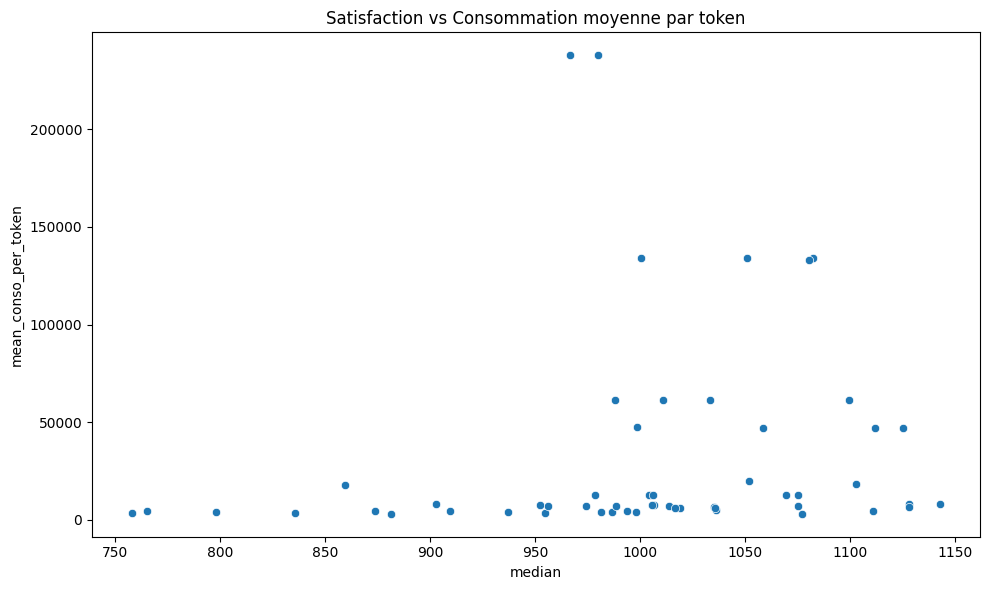

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_elo, x='median', y='mean_conso_per_token')
plt.title('Satisfaction vs Consommation moyenne par token')
plt.tight_layout()
plt.show()

In [ ]:
# Affichage de quelques statistiques
print(f"Nombre de points: {len(df_elo)}")
print(f"Corrélation: {df_elo['median'].corr(df_elo['mean_conso_per_token']):.3f}")

Nombre de points: 54
Corrélation: 0.147


In [ ]:
df_elo['TAILLE'] = df_elo['TAILLE'].replace({
        'na - S': 'na',
        'na - M': 'na',
        'na - XL': 'na',
        'na - L': 'na'
    })

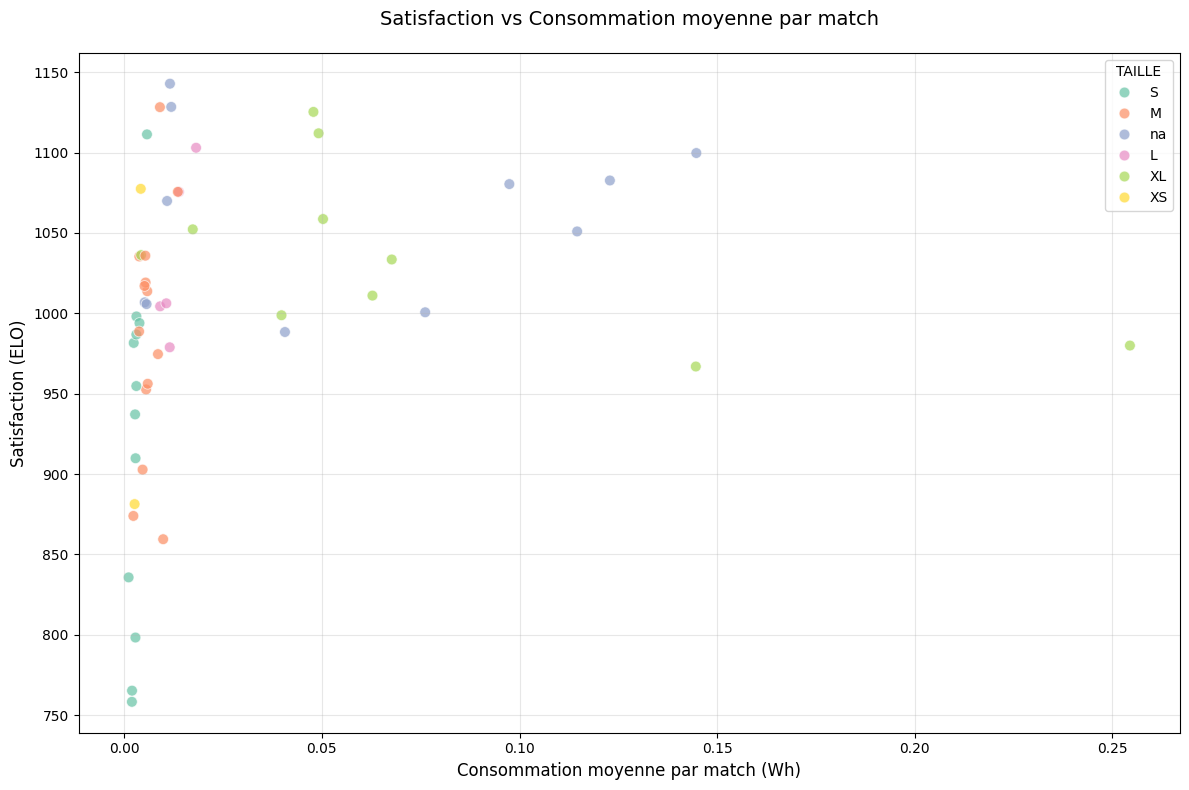

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_elo,
        x='mean_conso_per_match',
        y='median',
        hue='TAILLE',
        #size='TAILLE',
        #sizes=(30,200),
        alpha=0.7,
        s=60,                   # Taille fixe des points
        palette='Set2'        # Palette alternative
    )

plt.xlabel('Consommation moyenne par match (Wh)', fontsize=12)
plt.ylabel('Satisfaction (ELO)', fontsize=12)
plt.title('Satisfaction vs Consommation moyenne par match',
              fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('satisfaction_energie.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

---
# Notes

modèles propriétaires => les mettre en option ou ne pas les afficher.

ajouter la date de sortie entre parenthèses.
graphe dynmaqiue avec range de dates, checkbox avec modèles propriétaires/open weights
raisonnement/non
MOe /non
nb de paramètres actifs à la place de la consommation

suggestion Hadrien: aide de lecture